## Amazon Sales Dataset Analysis

In [41]:
# importaint libraries
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv(r"C:\Users\shame\Desktop\archive\Amazon.csv")

### 🔹Data Preparation

In [43]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Year'] = df['OrderDate'].dt.year
df['Month'] = df['OrderDate'].dt.month
df['MonthName'] = df['OrderDate'].dt.month_name()

### 🔹KPI Metrics

In [44]:
total_revenue = df['TotalAmount'].sum()
total_orders = df['OrderID'].nunique()
total_customers = df['CustomerID'].nunique()
avg_order_value = total_revenue / total_orders
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Customers: {total_customers}")
print(f"Average Order Value: ${avg_order_value:.2f}")

Total Revenue: $91825647.92
Total Orders: 100000
Total Customers: 43233
Average Order Value: $918.26


### 🔹Core Aggregations

#### 📈 Monthly Sales Trend

In [54]:
monthly_sales =(
    df.groupby(['Year', 'MonthName'])['TotalAmount']
    .sum()
    .reset_index()
)
monthly_sales

,Year,MonthName,TotalAmount
0,2020,April,1588347.29
1,2020,August,1640874.93
2,2020,December,1577655.06
3,2020,February,1339388.21
4,2020,January,1637069.40
5,2020,July,1552981.94
6,2020,June,1500269.29
7,2020,March,1587125.66
8,2020,May,1533834.17
9,2020,November,1502232.24


#### 📦 Category-wise Revenue

In [46]:
category_sales = (
    df.groupby("Category")['TotalAmount']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
category_sales

,Category,TotalAmount
0,Electronics,15584217.18
1,Sports & Outdoors,15345571.88
2,Books,15261837.01
3,Clothing,15253397.50
4,Toys & Games,15216684.99
5,Home & Kitchen,15163939.36


#### 🏆 Top 10 Products by Revenue

In [80]:
top10_products = (
    df.groupby("ProductName")
    .agg(total_quantity=("Quantity", "sum"), total_revenue=("TotalAmount", "sum"))
    .reset_index()
    .sort_values("total_revenue", ascending=False)
    .head(10)
)
top10_products

,ProductName,total_quantity,total_revenue
25,Memory Card 128GB,6240,1935138.40
22,LED Desk Lamp,6344,1921948.41
24,Mechanical Keyboard,6161,1906963.54
13,Electric Kettle,6165,1905751.79
39,Smartwatch,5983,1901275.59
11,Dress Shirt,5960,1896765.36
44,Water Bottle,6275,1895467.95
16,Gaming Mouse,6170,1895103.98
21,Kids Toy Car,6131,1891082.43
20,Jeans,6037,1882591.82


#### 🌍 Country-wise Sales

In [48]:
country_sales = (
    df.groupby("Country")['TotalAmount']
    .sum()
    .sort_values(ascending = False)
    .reset_index()
)
country_sales

,Country,TotalAmount
0,United States,64310048.50
1,India,13875839.12
2,Canada,5323757.00
3,United Kingdom,4526896.86
4,Australia,3789106.44


#### 💳 Payment Method Distribution

In [49]:
payment_dist = (
    df.groupby('PaymentMethod')['OrderID']
    .count()
    .reset_index(name = 'Orders')
)
payment_dist

,PaymentMethod,Orders
0,Amazon Pay,15017
1,Cash on Delivery,4928
2,Credit Card,35038
3,Debit Card,20024
4,Net Banking,9927
5,UPI,15066


#### 🚚 Order Status Breakdown

In [50]:
order_status_dist = (
    df.groupby('OrderStatus')['OrderID']
    .count()
    .reset_index(name = 'Orders')
)
order_status_dist

,OrderStatus,Orders
0,Cancelled,3028
1,Delivered,74628
2,Pending,4103
3,Returned,3049
4,Shipped,15192


### 🔹Visualizations 

#### 1️⃣ Monthly Sales Trend

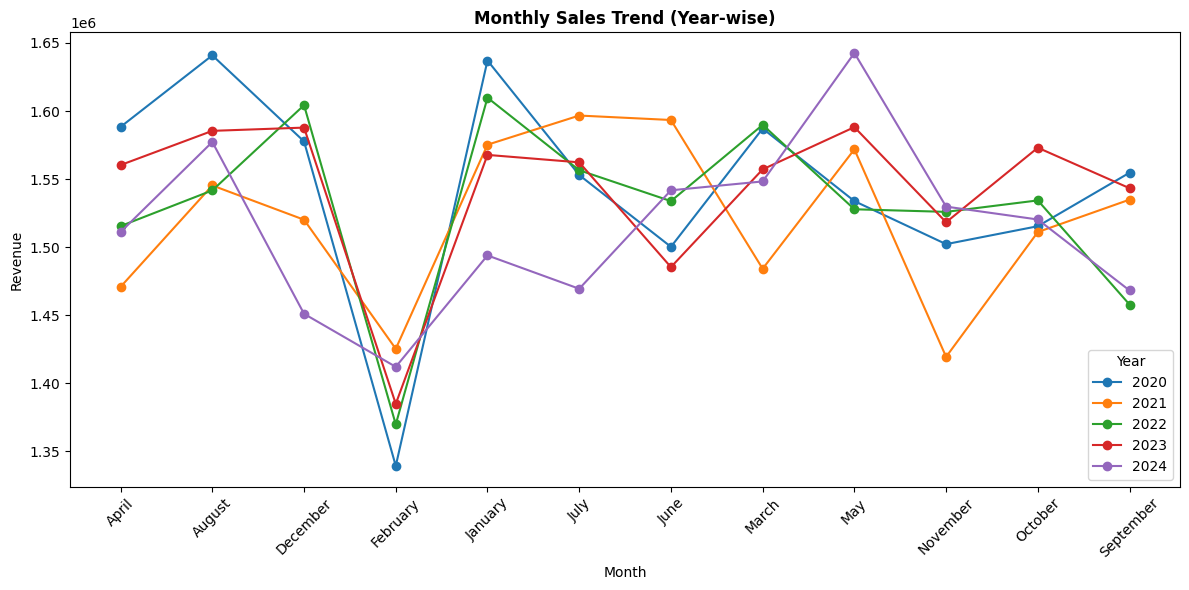

In [79]:
plt.figure(figsize=(12, 6))

for year in sorted(monthly_sales['Year'].unique()):
    data = monthly_sales[monthly_sales['Year'] == year].sort_values('MonthName')
    plt.plot(data['MonthName'], data['TotalAmount'], marker='o', label=str(year))

plt.title('Monthly Sales Trend (Year-wise)', fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation = 45)
plt.legend(title='Year',loc = 'lower right')
plt.tight_layout()
plt.show()


#### 2️⃣ Category-wise Revenue

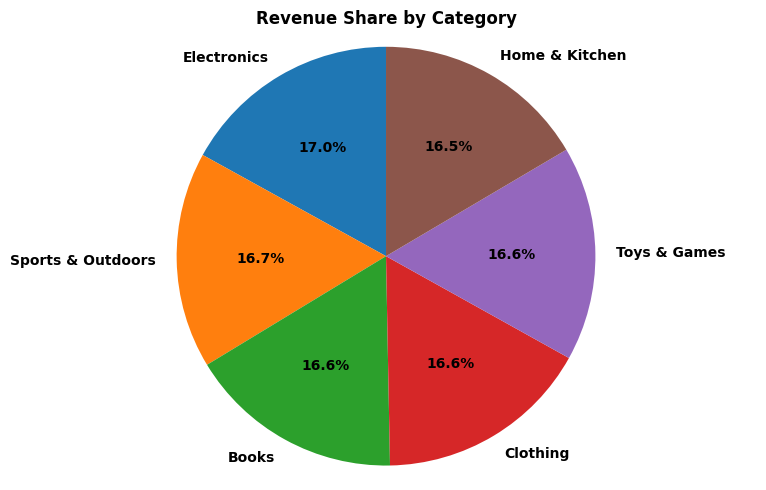

In [90]:
plt.figure(figsize=(8, 5))

plt.pie(
    category_sales['TotalAmount'],
    labels=category_sales['Category'],
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    textprops={'fontweight': 'bold'}
)

plt.title('Revenue Share by Category', fontweight='bold')
plt.axis('equal')  # Makes the pie a perfect circle
plt.tight_layout()
plt.show()

#### 3️⃣ Top Products

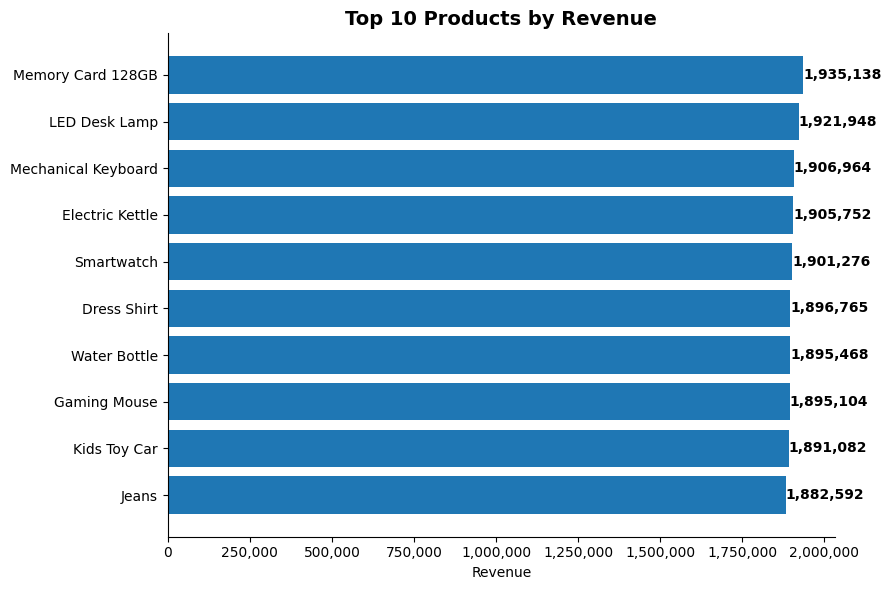

In [87]:
plt.figure(figsize=(9, 6))

bars = plt.barh(
    top10_products['ProductName'],
    top10_products['total_revenue']
)

plt.title('Top 10 Products by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Revenue')

# Highest revenue at the top
plt.gca().invert_yaxis()

# Remove scientific notation (1e6)
ax = plt.gca()
ax.ticklabel_format(style='plain', axis='x')
ax.xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Add value labels at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f'{width:,.0f}',
        va='center',
        ha='left',
        fontsize=10,
        fontweight='bold'
    )

# Clean look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


#### 4️⃣ Order Status Distribution

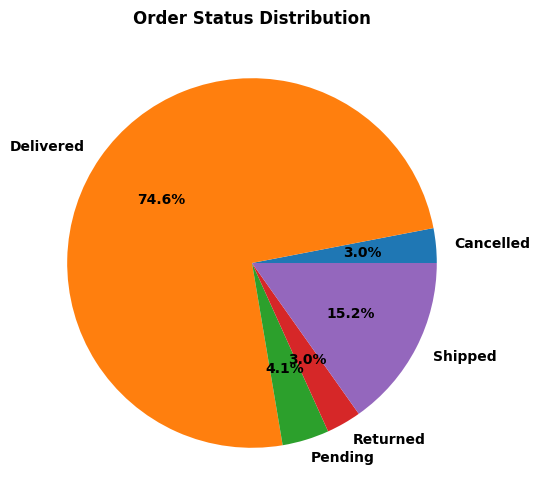

In [91]:
plt.figure(figsize=(6,6))

plt.pie(
    order_status_dist['Orders'],
    labels=order_status_dist['OrderStatus'],
    autopct='%1.1f%%',
    textprops={'fontweight': 'bold'}
)

plt.title('Order Status Distribution', fontweight='bold')
plt.show()

In [56]:
df.columns

Index(['OrderID', 'OrderDate', 'CustomerID', 'CustomerName', 'ProductID',
       'ProductName', 'Category', 'Brand', 'Quantity', 'UnitPrice', 'Discount',
       'Tax', 'ShippingCost', 'TotalAmount', 'PaymentMethod', 'OrderStatus',
       'City', 'State', 'Country', 'SellerID', 'Year', 'Month', 'MonthName'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   OrderID        100000 non-null  object        
 1   OrderDate      100000 non-null  datetime64[ns]
 2   CustomerID     100000 non-null  object        
 3   CustomerName   100000 non-null  object        
 4   ProductID      100000 non-null  object        
 5   ProductName    100000 non-null  object        
 6   Category       100000 non-null  object        
 7   Brand          100000 non-null  object        
 8   Quantity       100000 non-null  int64         
 9   UnitPrice      100000 non-null  float64       
 10  Discount       100000 non-null  float64       
 11  Tax            100000 non-null  float64       
 12  ShippingCost   100000 non-null  float64       
 13  TotalAmount    100000 non-null  float64       
 14  PaymentMethod  100000 non-null  object        
 15  O

In [9]:
df['Category'].value_counts()

Category
Electronics          16853
Sports & Outdoors    16804
Books                16752
Home & Kitchen       16610
Toys & Games         16542
Clothing             16439
Name: count, dtype: int64

In [10]:
df['OrderStatus'].value_counts()

OrderStatus
Delivered    74628
Shipped      15192
Pending       4103
Returned      3049
Cancelled     3028
Name: count, dtype: int64

In [11]:
df['PaymentMethod'].value_counts()

PaymentMethod
Credit Card         35038
Debit Card          20024
UPI                 15066
Amazon Pay          15017
Net Banking          9927
Cash on Delivery     4928
Name: count, dtype: int64

In [12]:
df['Country'].value_counts()

Country
United States     70058
India             15051
Canada             5818
United Kingdom     4943
Australia          4130
Name: count, dtype: int64